# Data Analysis Project
### Goal:
**To determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
----

## Part One: Understanding the Background and Data

----
### The Data
There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Exploring the relationship between popularity of a film and its rating** 

**A scatterplot showing the relationship between rating and votes**

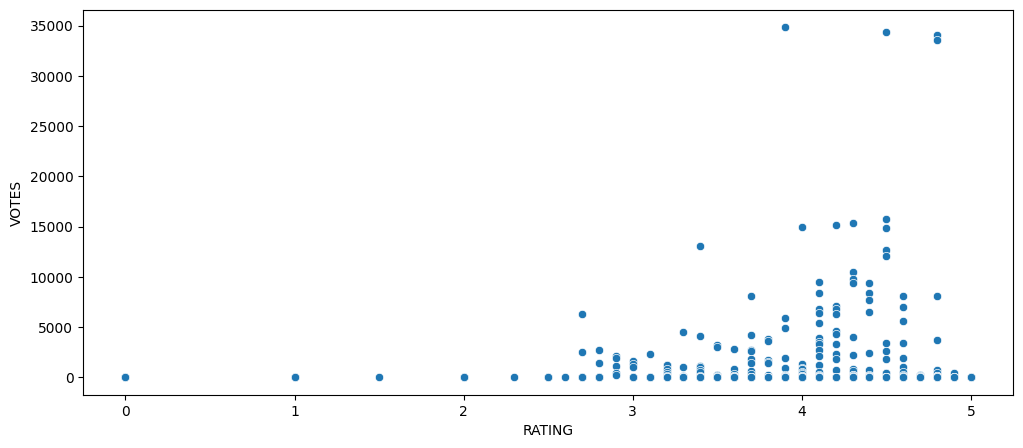

In [6]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

**Correlation between the columns:**

In [7]:
fandango.corr()

C:\Users\Sukruth\AppData\Local\Temp\ipykernel_24332\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [8]:
def splityear(name):
    n=name.split(' ')
    n=int(n[-1][1:5])
    return n

fandango['YEAR']=fandango['FILM'].apply(splityear)
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Number of movies in Fandango DataFrame per year**

In [9]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualizing the count of movies per year with a plot**

<Axes: xlabel='YEAR', ylabel='count'>

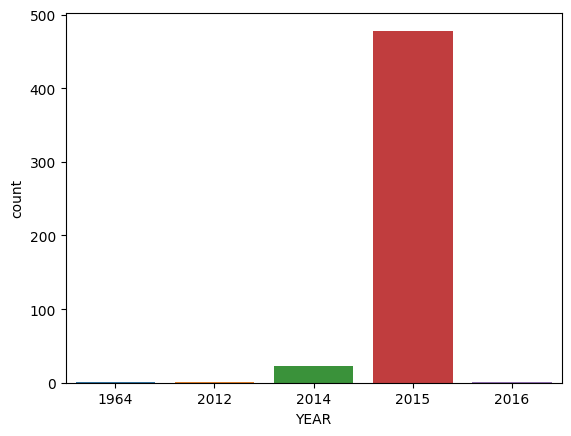

In [10]:
sns.countplot(data=fandango,x='YEAR')

**10 movies with the highest number of votes**

In [11]:
fandango.sort_values('VOTES',ascending=False)[0:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Number of movies having zero votes**

In [12]:
fandango['VOTES'].value_counts()[0]

69

**DataFrame of only reviewed films by removing any films that have zero votes.**

In [13]:
rev_df=fandango[fandango['VOTES']>0]
rev_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)**

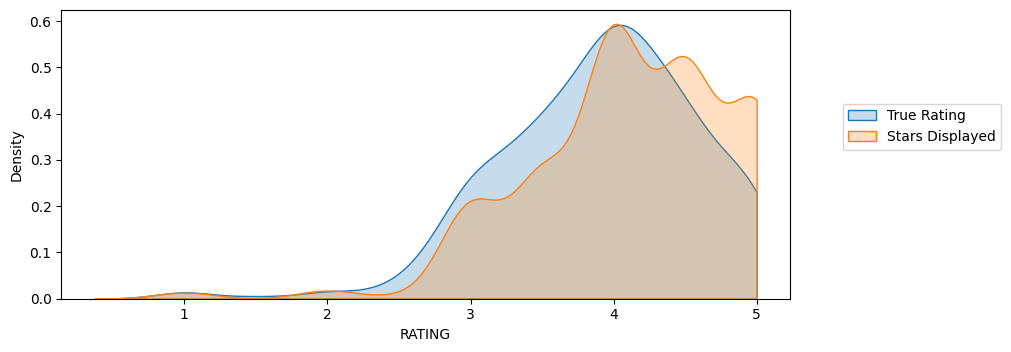

In [14]:
plt.figure(figsize=(9.4,3.75))
kp=sns.kdeplot(data=rev_df,x='RATING',fill=True,clip=[0,5],label='True Rating')
kp=sns.kdeplot(data=rev_df,x='STARS',fill=True,clip=[0,5],label='Stars Displayed')
plt.legend(bbox_to_anchor=(1.3,0.7))

**Creating a new column of the difference between STARS displayed versus true RATING**

In [15]:
rev_df['STARS_DIFF']=np.round(rev_df['STARS']-rev_df['RATING'],1);


C:\Users\Sukruth\AppData\Local\Temp\ipykernel_24332\2262574251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df['STARS_DIFF']=np.round(rev_df['STARS']-rev_df['RATING'],1);


In [16]:
rev_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Count plot to display the number of times a certain difference occured**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

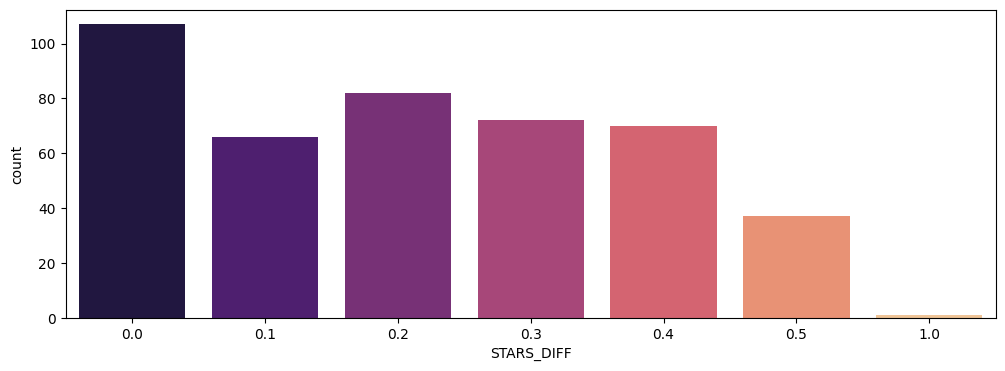

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data=rev_df,x='STARS_DIFF',palette='magma')

**We can see from the plot that some movies were displaying over a 1 star difference than its true rating. Finding what movies had this close to 1 star differential**

In [18]:
rev_df[rev_df['STARS_DIFF']>=1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Exploring the DataFrame columns, info, description.**

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Rotten Tomatoes has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

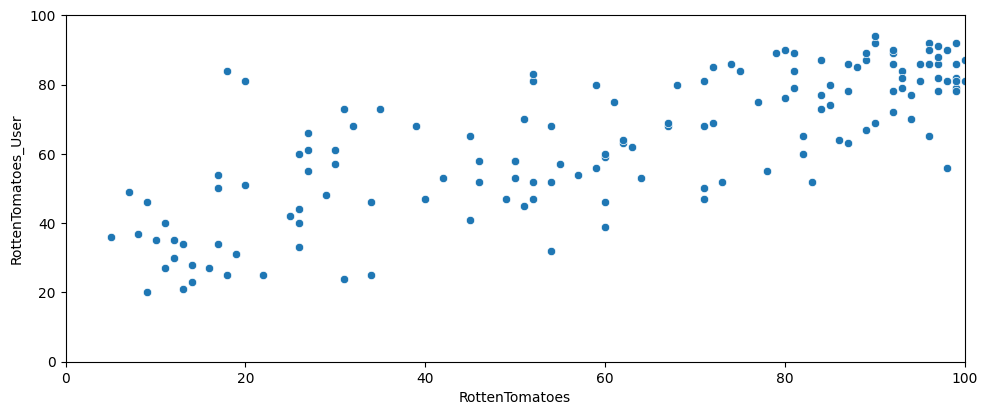

In [23]:
plt.figure(figsize=(11.6,4.5))
plt.xlim(0,100)
plt.ylim(0,100)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

Quantifying this difference by comparing the critics ratings and the RT User ratings. Calculating this with RottenTomatoes-RottenTomatoes_User. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes**

In [24]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Calculating the Mean Absolute Difference between RT scores and RT User scores**

In [25]:
np.absolute(all_sites['Rotten_Diff']).mean()

15.095890410958905

**Ploting the distribution of the differences between RT Critics Score and RT User Score**

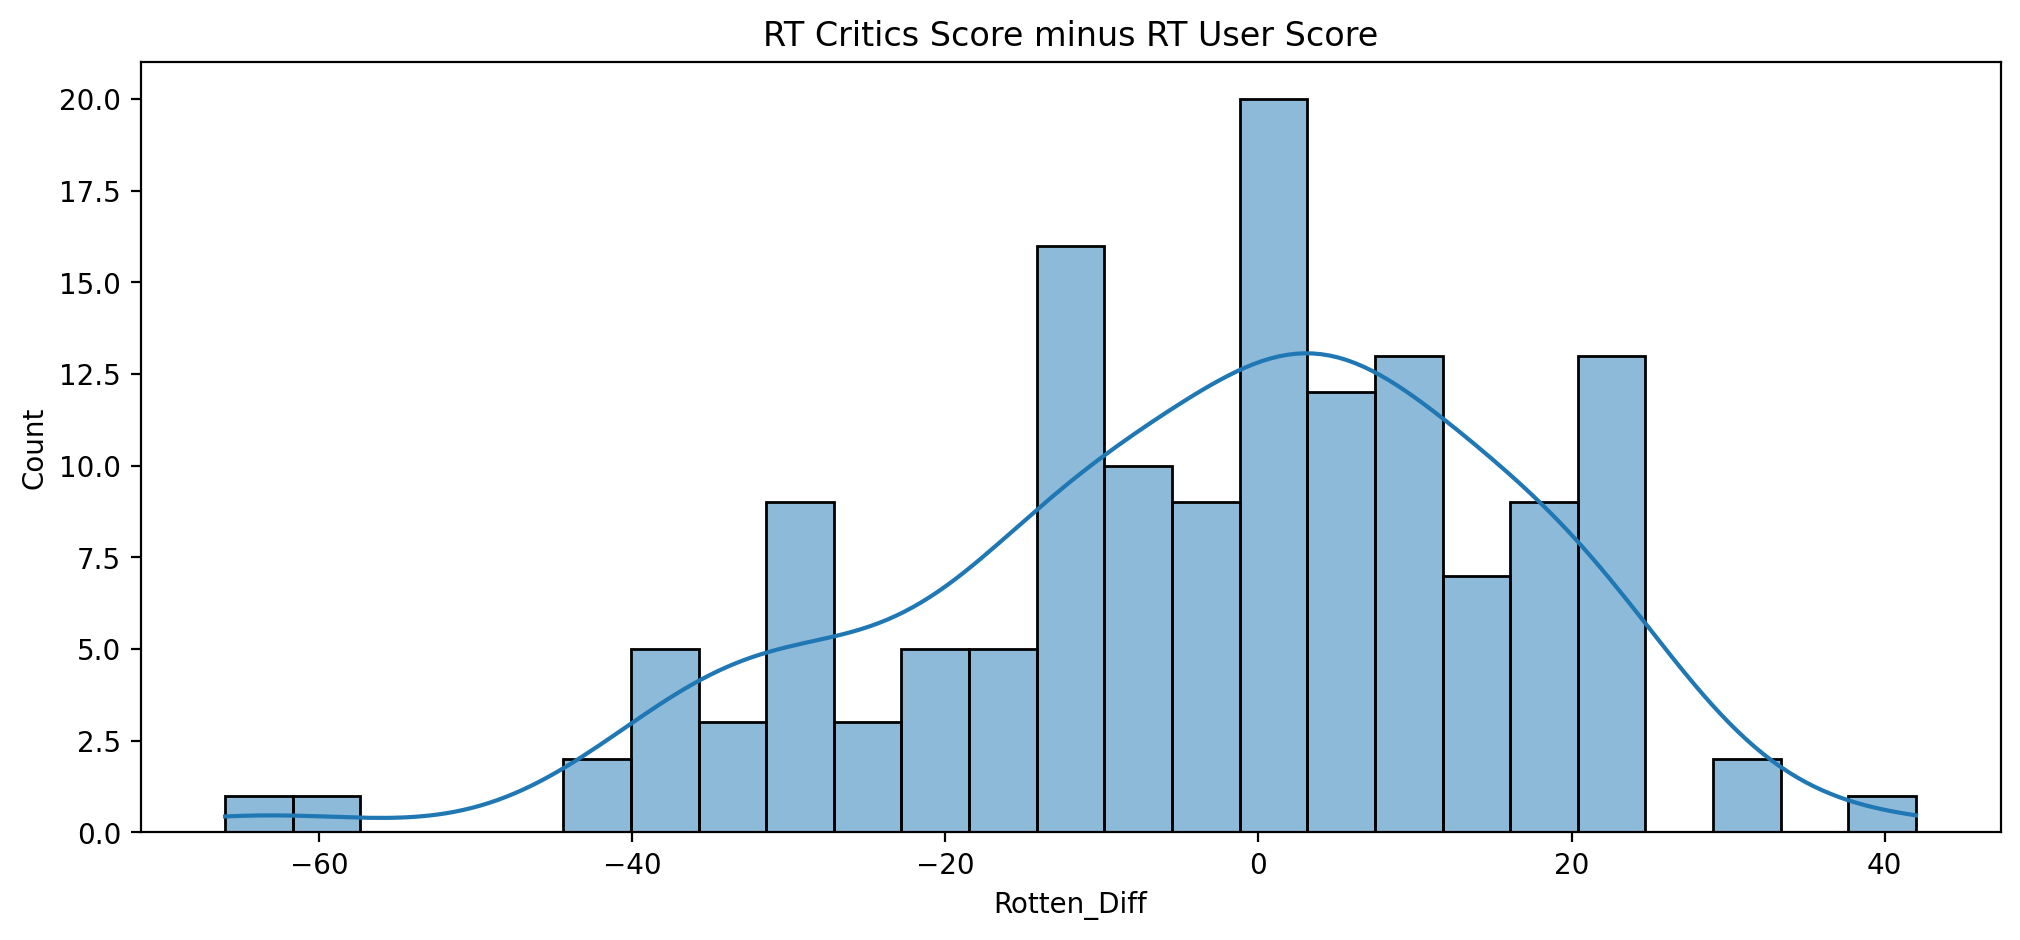

In [26]:
plt.figure(figsize=(12,5),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',bins=25,kde=True)
plt.title("RT Critics Score minus RT User Score");

**Create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes**

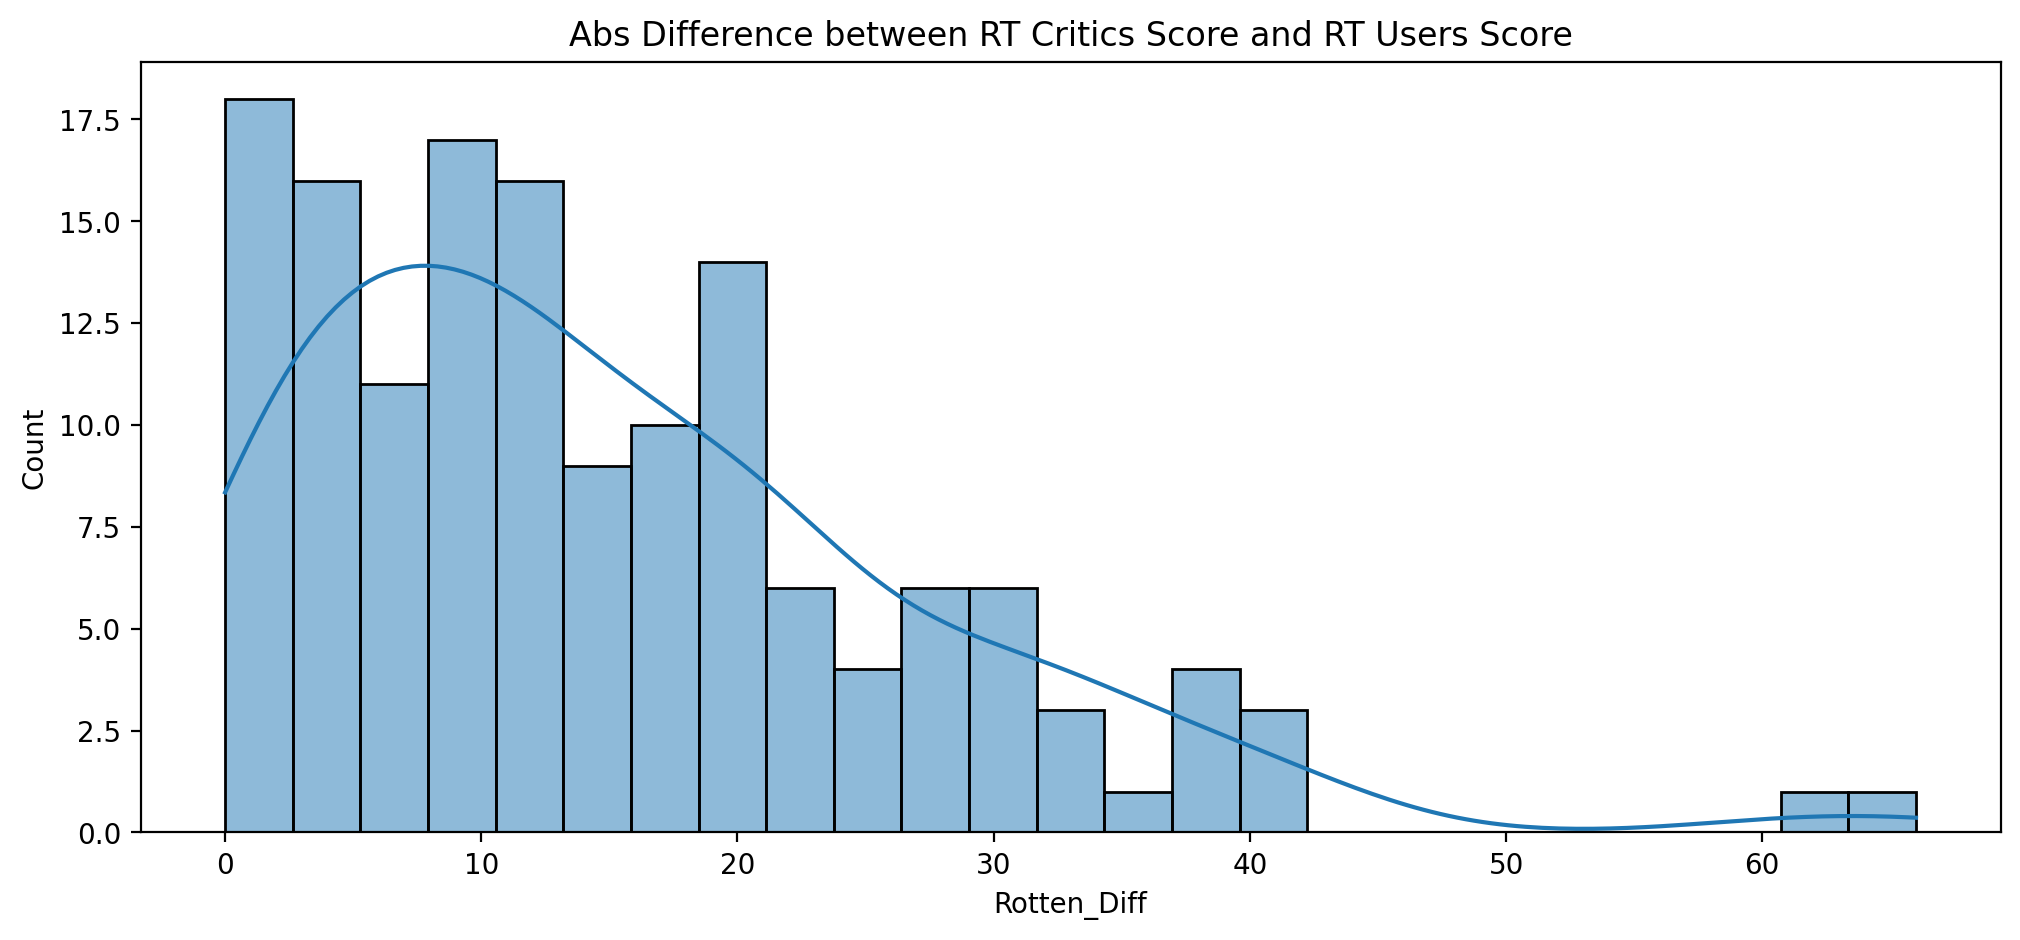

In [27]:
plt.figure(figsize=(12,5),dpi=200)
sns.histplot(data=all_sites,x=np.absolute(all_sites['Rotten_Diff']),bins=25,kde=True)
plt.title('Abs Difference between RT Critics Score and RT Users Score');

**Top 5 movies users rated higher than critics on average:**

In [28]:
all_sites[['FILM','Rotten_Diff']].sort_values('Rotten_Diff',)[0:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average**

In [29]:
all_sites[['FILM','Rotten_Diff']].sort_values('Rotten_Diff',ascending=False)[0:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Metacritic shows an average user rating versus their official displayed rating

**Scatterplot of the Metacritic Rating versus the Metacritic User rating**

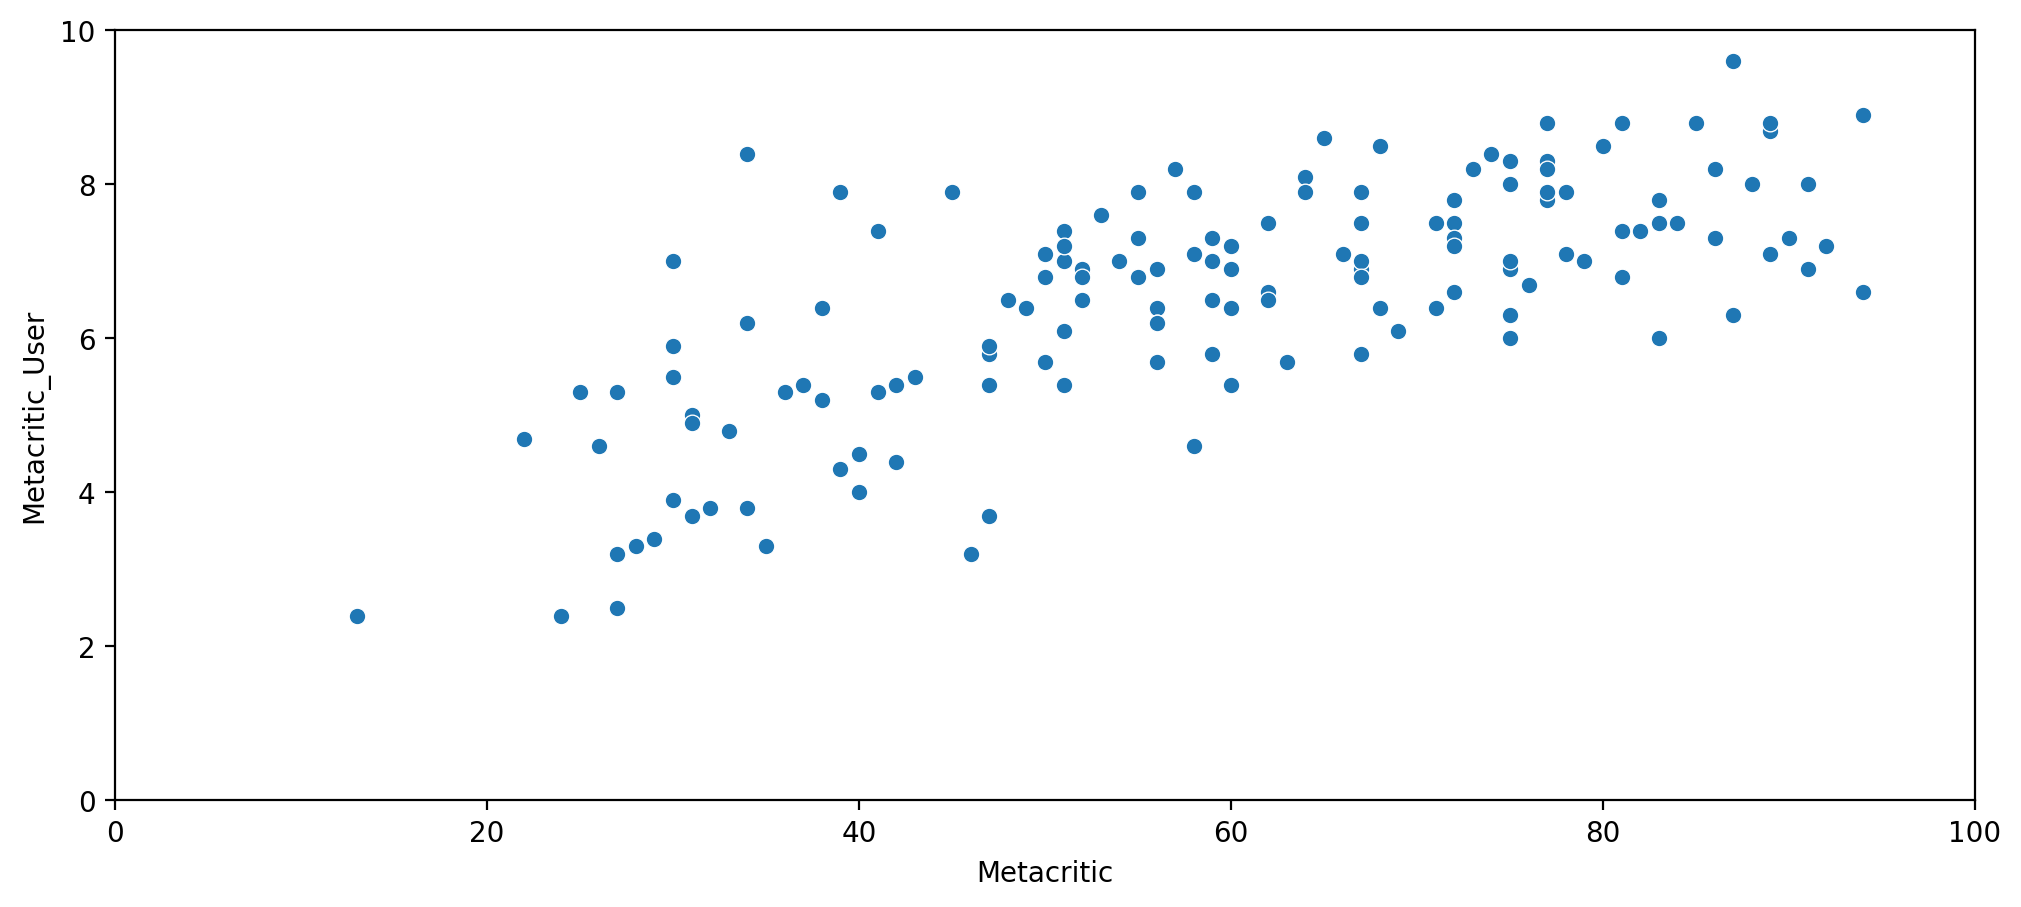

In [30]:
plt.figure(figsize=(12,5),dpi=200)
plt.xlim(0,100)
plt.ylim(0,10)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User');

## IMDB

**Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

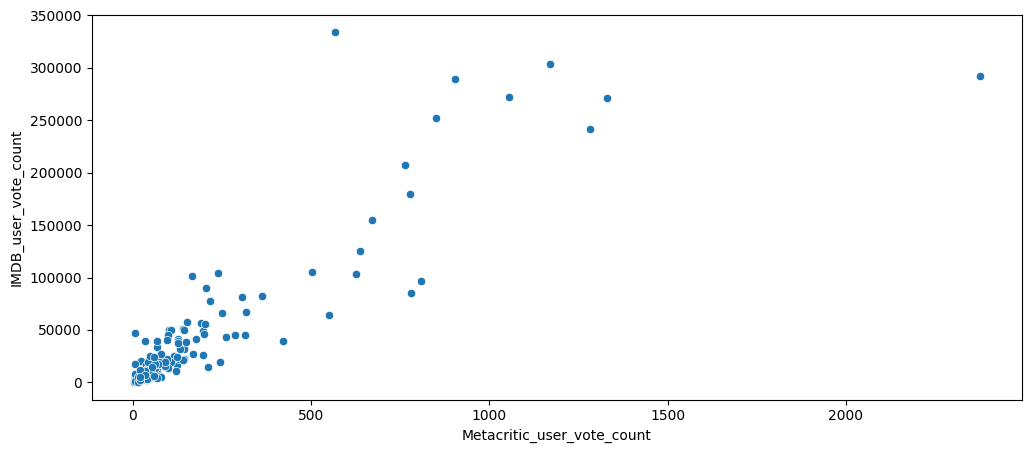

In [31]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Movie having the highest IMDB user vote count**

In [32]:
all_sites[all_sites['IMDB_user_vote_count']>=all_sites['IMDB_user_vote_count'].max()]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie having the highest Metacritic User Vote count**

In [33]:
all_sites[all_sites['Metacritic_user_vote_count']>=all_sites['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

**Combining the Fandango Table with the All Sites table. Doing an *inner* merge to merge together both DataFrames based on the FILM columns**

In [34]:
comb_df=pd.merge(how='inner',left=fandango,right=all_sites,on='FILM')
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [35]:
comb_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalizing columns to Fandango STARS and RATINGS 0-5 

**Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango**

In [36]:
comb_df['RT_Norm']=np.round(comb_df['RottenTomatoes']/20,1)
comb_df['RTU_Norm']=np.round(comb_df['RottenTomatoes_User']/20,1)

In [37]:
comb_df['Meta_Norm']=np.round(comb_df['Metacritic']/20,1)
comb_df['Meta_U_Norm']=np.round(comb_df['Metacritic_User']/2,1)

In [38]:
comb_df['IMDB_Norm']=np.round(comb_df['IMDB']/2,1)

In [39]:
comb_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Creating a norm_scores DataFrame that only contains the normalizes ratings**

In [40]:
norm_scores=pd.DataFrame(data=comb_df,columns=['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'])
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

**Creating a plot comparing the distributions of normalized ratings across all sites**

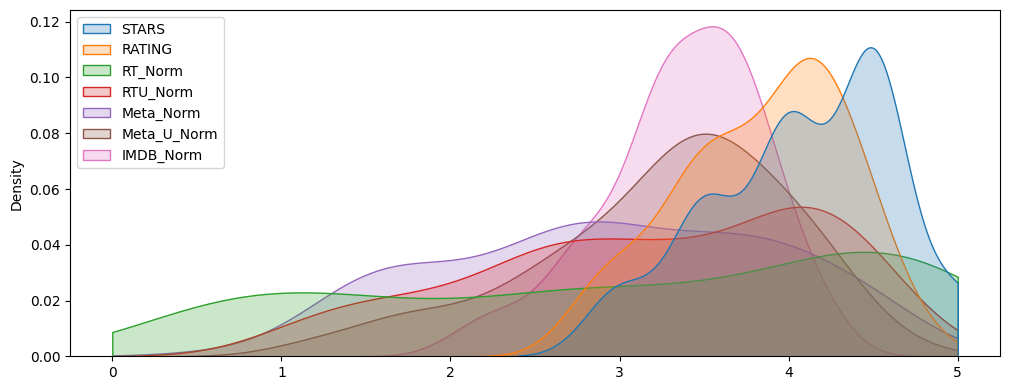

In [41]:
plt.figure(figsize=(12,4.5))
kp=sns.kdeplot(data=norm_scores,fill=True,clip=[0,5])
sns.move_legend(kp,'upper left')

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution

**Creating a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango**

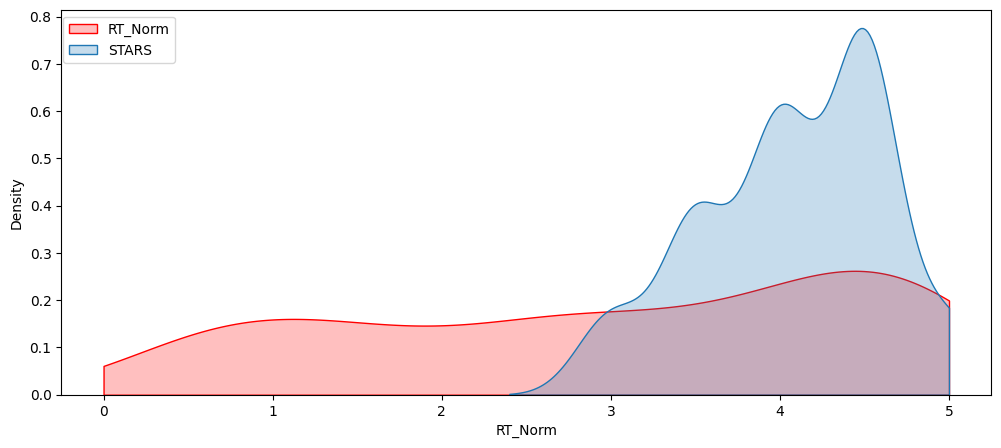

In [42]:
plt.figure(figsize=(12,5))
k2=sns.kdeplot(data=norm_scores,x='RT_Norm',fill=True,clip=[0,5],color='red',label='RT_Norm')
k2=sns.kdeplot(data=norm_scores,x='STARS',fill=True,clip=[0,5],label='STARS')
plt.legend(bbox_to_anchor=(0.13,1));

**Creating a histplot comparing all normalized scores**

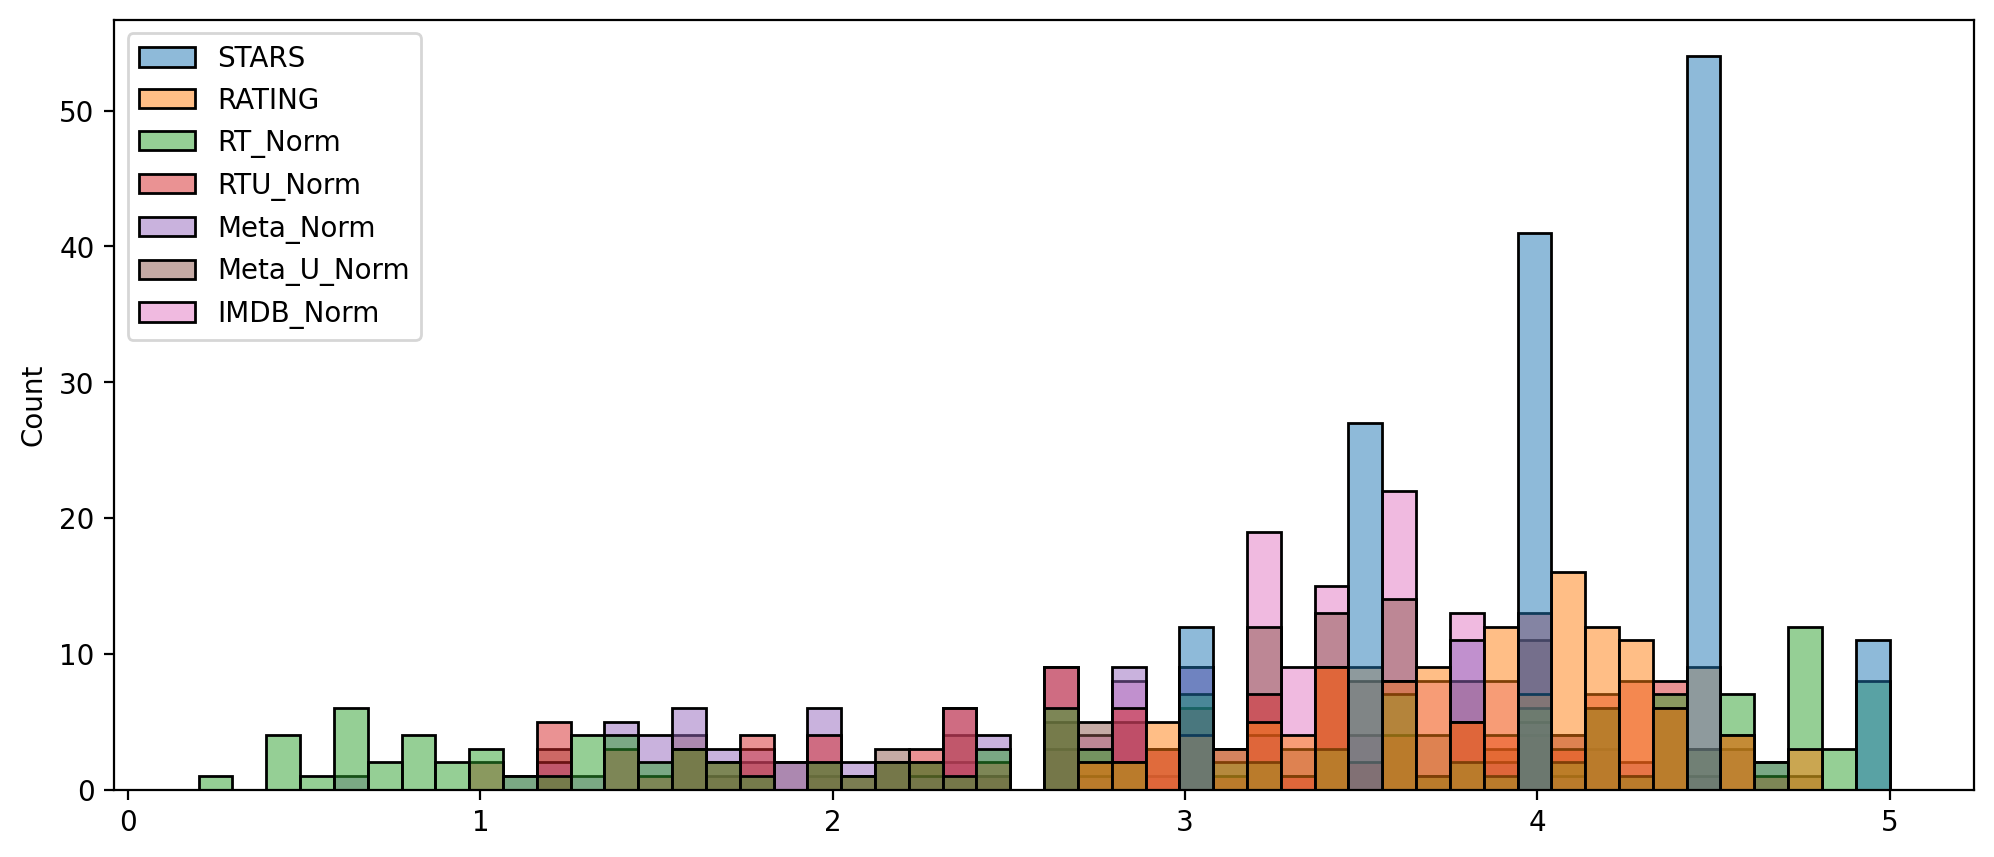

In [43]:
plt.figure(figsize=(12,5),dpi=200)
hp=sns.histplot(data=norm_scores,bins=50)
sns.move_legend(hp,'upper left')


### How are the worst movies rated across all platforms?

**Creating a clustermap visualization of all normalized scores**

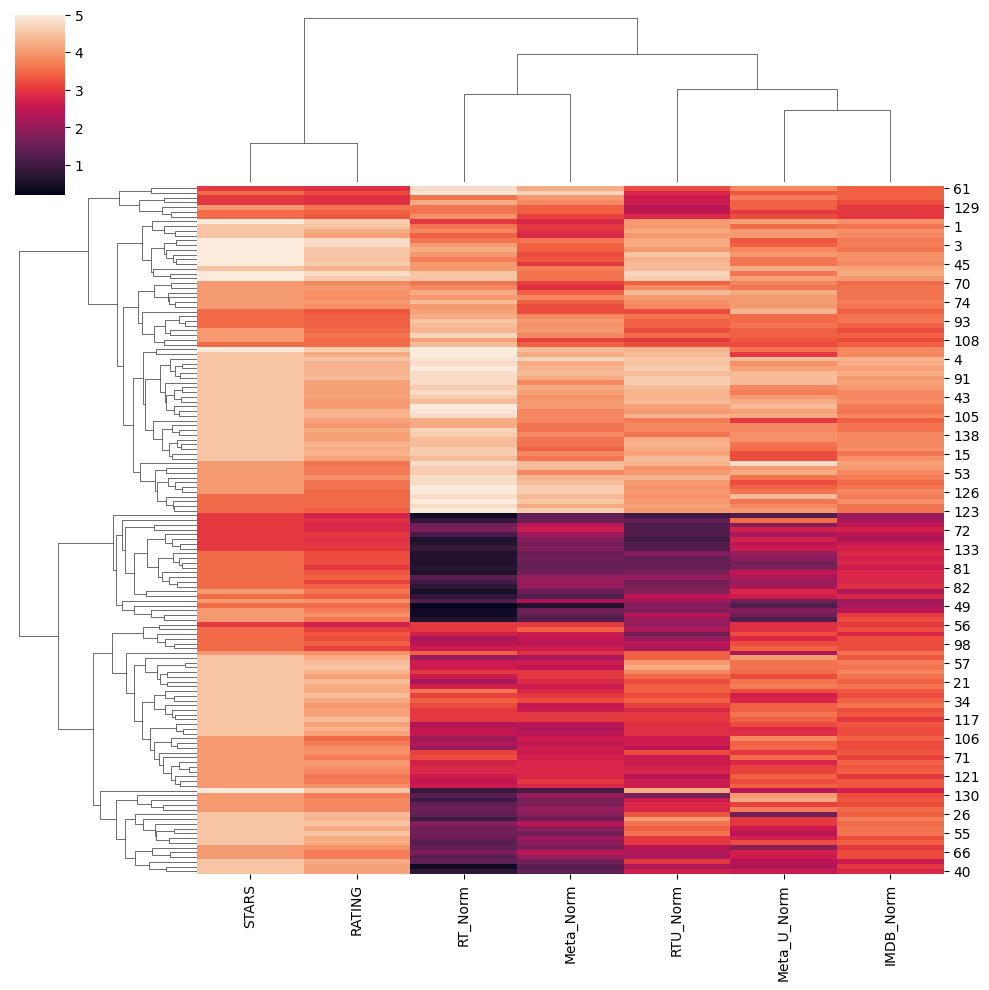

In [44]:
norm_scores=norm_scores.drop('FILM',axis=1)
sns.clustermap(data=norm_scores)

**Clearly Fandango is rating movies much higher than other sites. Examining the top 10 worst movies based off the Rotten Tomatoes Critic Ratings**

In [45]:
norm_scores['FILM']=comb_df['FILM']
norm_scores.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Visualizing the distribution of ratings across all sites for the top 10 worst movies**

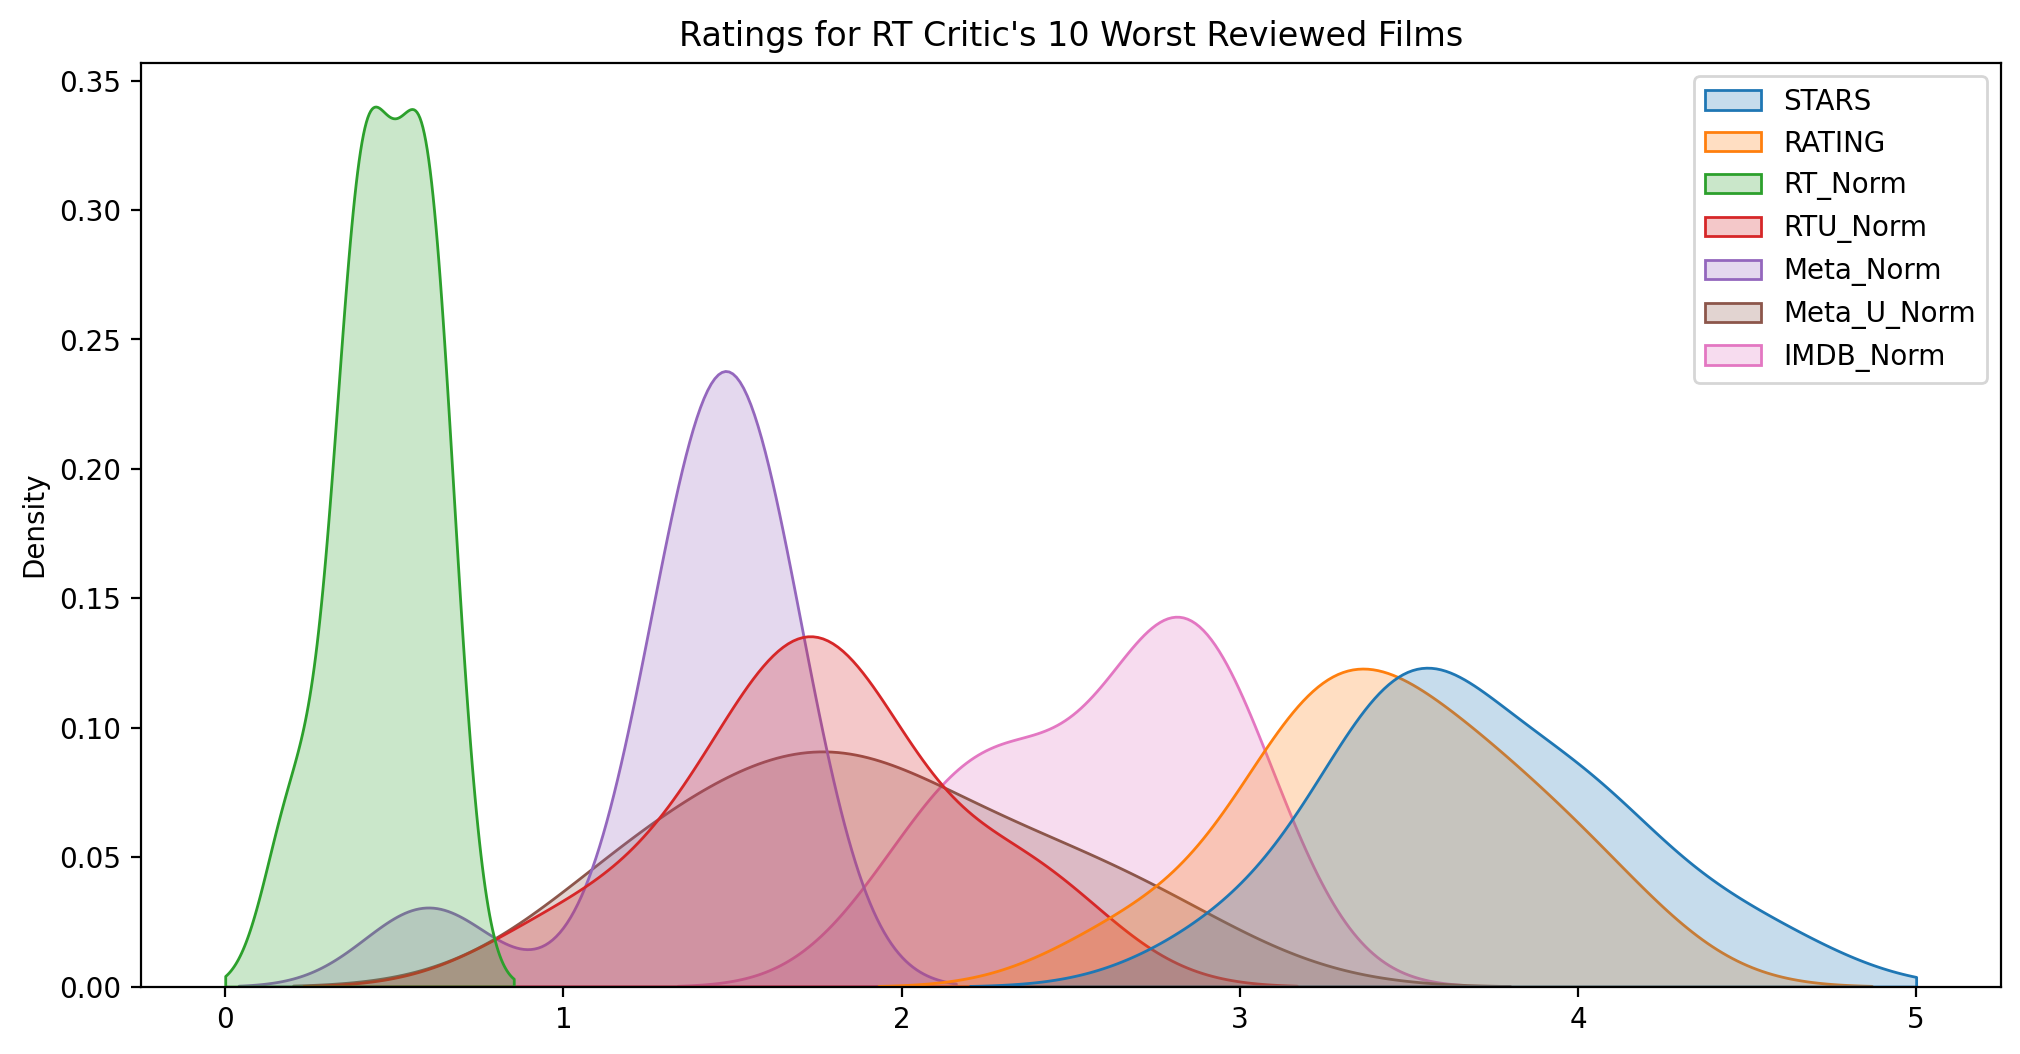

In [46]:
plt.figure(figsize=(12,6),dpi=200)
sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'),fill=True,clip=[0,5])
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

**Fandango is showing around 3-4 star ratings for films that are clearly bad! The biggest offender is Taken 3. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!**

In [47]:
norm_scores.loc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [48]:
0.4+2.3+1.3+2.3+3

9.3

In [49]:
9.3/5

1.86

----